In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import seaborn as sns
sns.set(style="ticks", color_codes=True)
%matplotlib inline

In [49]:
conflict=pd.read_csv('../Capstone dataset/ged181.csv',low_memory=False)

In [50]:
conflict.head()

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,gwnoa,...,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,low,best,high
0,86148,1989,1,3,519,Sikh insurgents - Civilians,986,Sikh insurgents - Civilians,319,NaN,...,1,1989-01-01,1989-01-01,0,0,5,0,5,5,5
1,94814,1989,1,1,351,India:Punjab/Khalistan,775,Government of India - Sikh insurgents,141,750,...,5,1989-01-01,1989-12-31,172,633,0,0,805,805,805
2,77563,1989,1,3,511,JVP - Civilians,978,JVP - Civilians,281,NaN,...,1,1989-01-13,1989-01-13,0,0,0,0,0,0,2
3,17466,1989,1,2,4841,Supporters of IFP - Supporters of UDF,5451,Supporters of IFP - Supporters of UDF,620,NaN,...,1,1989-01-18,1989-01-18,0,0,0,1,1,1,1
4,96586,1992,1,3,531,NDFB - Civilians,998,NDFB - Civilians,363,NaN,...,1,1992-10-20,1992-10-20,0,0,4,0,4,4,4


In [51]:
conflict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142902 entries, 0 to 142901
Data columns (total 42 columns):
id                   142902 non-null int64
year                 142902 non-null int64
active_year          142902 non-null int64
type_of_violence     142902 non-null int64
conflict_new_id      142902 non-null int64
conflict_name        142902 non-null object
dyad_new_id          142902 non-null int64
dyad_name            142902 non-null object
side_a_new_id        142902 non-null int64
gwnoa                110222 non-null object
side_a               142902 non-null object
side_b_new_id        142902 non-null int64
gwnob                742 non-null float64
side_b               142902 non-null object
number_of_sources    142902 non-null int64
source_article       142569 non-null object
source_office        37250 non-null object
source_date          37250 non-null object
source_headline      37250 non-null object
source_original      104568 non-null object
where_prec           14

From these informations we can already see that some features won't be relevant in our exploratory analysis as there are too much missing values (such as gwnoa,source_office and source_data). Plus there is so much features to analyse that it may be better to concentrate on the ones which can give us real insights. Let's just remove Id and the features with 30% or less NaN values.

In [52]:
# df.count() does not include NaN values
df = conflict[[column for column in conflict if conflict[column].count() / len(conflict) >= 0.3]]
del df['id']
print("List of dropped columns:", end=" ")
for c in conflict.columns:
    if c not in df.columns:
        print(c, end=", ")
print('\n')
conflict = df

List of dropped columns: id, gwnob, source_office, source_date, source_headline, 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a42f99a20>,
      dtype=object)

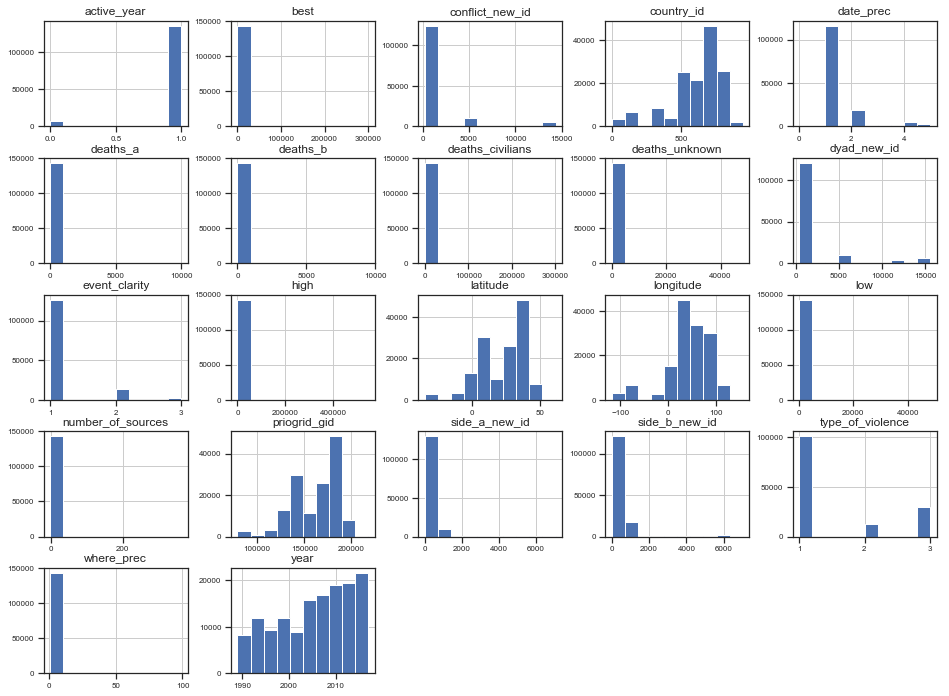

In [53]:
conflict.hist(figsize=(16, 12), bins=10, xlabelsize=8, ylabelsize=8)

Text(0.5, 1.05, 'Pearson Correlation of Features')

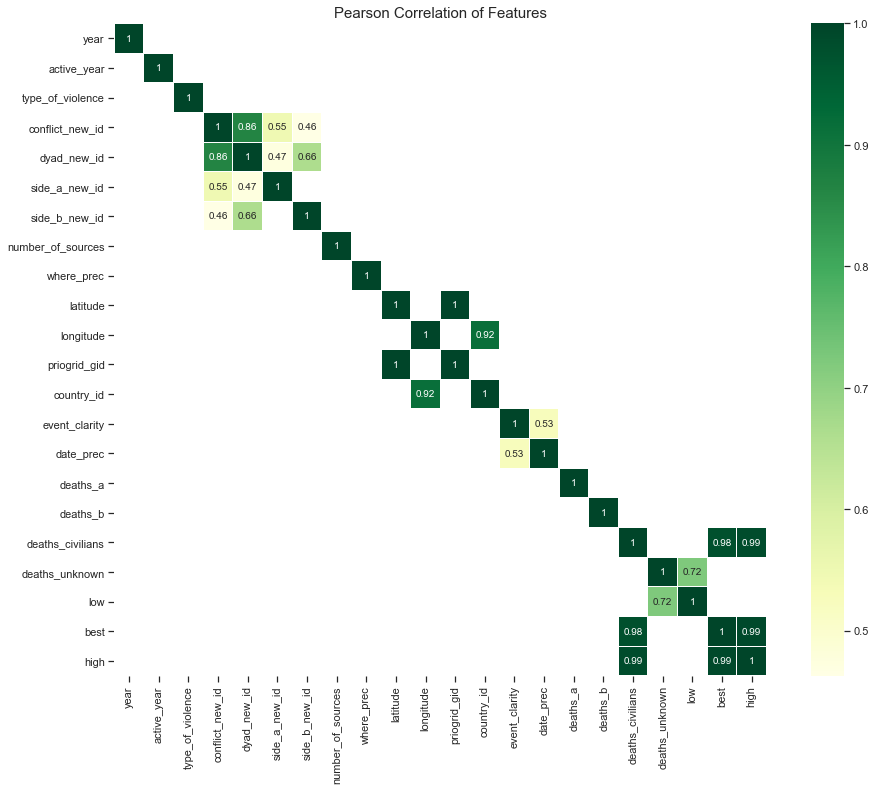

In [54]:
corr = conflict.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
_ = sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], cmap="YlGn", square=True, ax = ax, annot=True, linewidth = 0.1)

plt.title('Pearson Correlation of Features', y=1.05, size=15)

In [55]:
conflict=conflict[['year','conflict_new_id','dyad_new_id','side_a_new_id','side_b_new_id',
                        'longitude','country_id','event_clarity','date_prec','deaths_civilians','best','active_year','type_of_violence','conflict_name','side_a','side_b','where_coordinates','country','region','event_clarity','date_prec','date_start','date_end','best']]
conflict_19_20=conflict[conflict.year > 1899].reset_index(drop=True)

conflict_19_20.head()

,year,conflict_new_id,dyad_new_id,side_a_new_id,side_b_new_id,longitude,country_id,event_clarity,date_prec,deaths_civilians,...,side_a,side_b,where_coordinates,country,region,event_clarity,date_prec,date_start,date_end,best
0,1989,519,986,319,1,75.416670,750,1,1,5,...,Sikh insurgents,Civilians,Punjab State,India,Asia,1,1,1989-01-01,1989-01-01,5
1,1989,351,775,141,319,75.416670,750,2,5,0,...,Government of India,Sikh insurgents,Punjab State,India,Asia,2,5,1989-01-01,1989-12-31,805
2,1989,511,978,281,1,80.551500,780,1,1,0,...,JVP,Civilians,Deniyaya town,Sri Lanka,Asia,1,1,1989-01-13,1989-01-13,0
3,1989,4841,5451,620,983,30.636458,560,1,1,0,...,Supporters of IFP,Supporters of UDF,Mpumalanga town,South Africa,Africa,1,1,1989-01-18,1989-01-18,1
4,1992,531,998,363,1,92.800000,750,1,1,4,...,NDFB,Civilians,Sonitpur district,India,Asia,1,1,1992-10-20,1992-10-20,4


There is 15 correlated values with Year:
year                1.000000
dyad_new_id         0.238214
conflict_new_id     0.192456
side_b_new_id       0.188353
country_id          0.139166
longitude           0.134292
side_a_new_id       0.071549
active_year         0.036479
event_clarity       0.010542
event_clarity       0.010542
deaths_civilians   -0.007568
best               -0.012103
date_prec          -0.065405
date_prec          -0.065405
type_of_violence   -0.099923
Name: year, dtype: float64


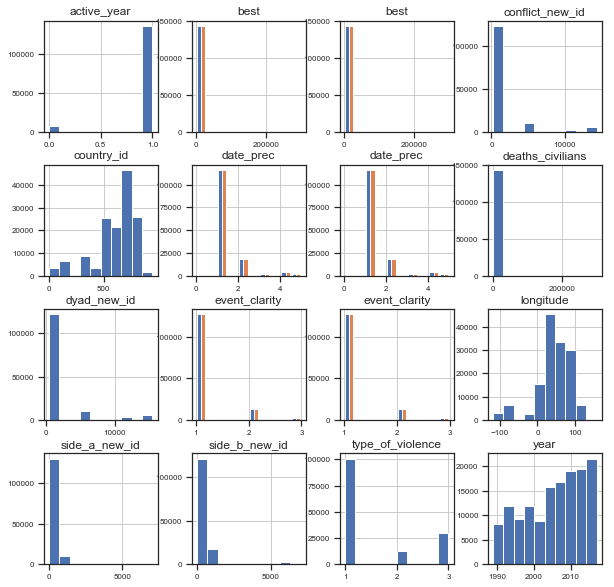

In [56]:
numerical_attributes = conflict_19_20.select_dtypes(include=['float64', 'int64'])
numerical_attributes.hist(figsize=(10, 10), bins=10, xlabelsize=8, ylabelsize=8);
conflict_19_20_corr=conflict_19_20.corr()['year'][:-1]
strong = conflict_19_20_corr[abs(conflict_19_20_corr) > 0].sort_values(ascending=False)
print("There is {} correlated values with Year:\n{}".format(len(strong), strong))

In [57]:
# Plotting count plot for categorical values
categorical_attributes = conflict_19_20.select_dtypes(include=['object'])
categorical_attributes

,conflict_name,side_a,side_b,where_coordinates,country,region,date_start,date_end
0,Sikh insurgents - Civilians,Sikh insurgents,Civilians,Punjab State,India,Asia,1989-01-01,1989-01-01
1,India:Punjab/Khalistan,Government of India,Sikh insurgents,Punjab State,India,Asia,1989-01-01,1989-12-31
2,JVP - Civilians,JVP,Civilians,Deniyaya town,Sri Lanka,Asia,1989-01-13,1989-01-13
3,Supporters of IFP - Supporters of UDF,Supporters of IFP,Supporters of UDF,Mpumalanga town,South Africa,Africa,1989-01-18,1989-01-18
4,NDFB - Civilians,NDFB,Civilians,Sonitpur district,India,Asia,1992-10-20,1992-10-20
5,LTTE - Civilians,LTTE,Civilians,North Eastern,Sri Lanka,Asia,1989-02-11,1989-02-11
6,IFP - Civilians,IFP,Civilians,Nqutu town,South Africa,Africa,1993-11-07,1993-11-07
7,Supporters of ANC - Supporters of IFP,Supporters of ANC,Supporters of IFP,Durban town,South Africa,Africa,1989-02-19,1989-02-19
8,Philippines:Government,Government of Philippines,CPP,Abra province,Philippines,Asia,1989-03-01,1989-03-03
9,Mohajir - Pashtun,Mohajir,Pashtun,Karachi Town,Pakistan,Asia,1989-03-10,1989-03-14


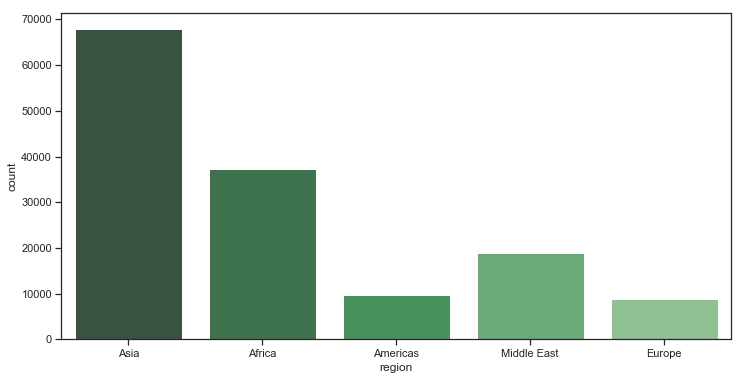

In [58]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'region', data = categorical_attributes, palette="Greens_d")

In [59]:
#conflict_19_20['date_start']=pd.to_datetime(conflict_19_20['date_start'], format='%Y-%m-%d')
#conflict_19_20['date_end']=pd.to_datetime(conflict_19_20['date_end'], format='%Y-%m-%d')
#conflict_19_20['HowManyDays']=abs(conflict_19_20['date_end']-conflict_19_20['date_start'])
#conflict_19_20=conflict_19_20.rename(columns={'active_year':'active_conf','date_prec':'event_report_frame','best':'death_number'})
#conflict_19_20['active_year']=conflict_19_20['active_year'].replace(1, 'Active Conflict').replace(2,'Not Active')
#conflict_19_20['event_clarity']=conflict_19_20['event_clarity'].replace(1, 'High').replace(2,'Low')
#conflict_19_20['date_prec']=conflict_19_20['date_prec'].replace(1, 'Exact Date').replace(2,'Within a 2-6 day range').replace(3,'Only the week of the event').replace(4,'Within an 8-30 day range or only the month').replace(5,'within a range longer than one month but not more than one calendar year.')

#### Total number of violence types

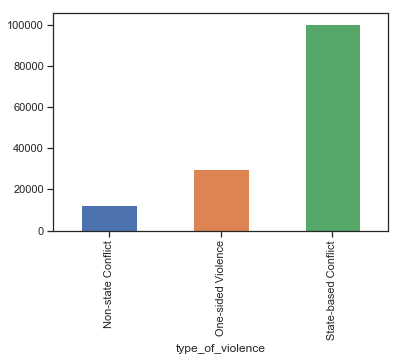

In [60]:
conflict_19_20['type_of_violence']=conflict_19_20['type_of_violence'].replace(1, 'State-based Conflict').replace(2,'Non-state Conflict').replace(3,'One-sided Violence')
TofV=conflict_19_20.groupby('type_of_violence').count()[['year']]
TofV['year'].plot(kind='bar')
plt.xlabel('type_of_violence')
plt.show()

#### Involved group/state A (first 10)

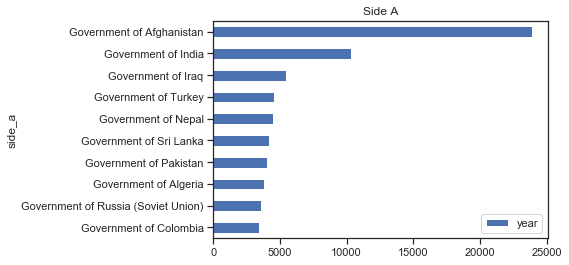

In [62]:
SideA=conflict_19_20.groupby('side_a').count()[['year']]
SideA.sort_values(by=['year'])[-10:].plot.barh(stacked=True)
plt.title('Side A')
plt.show()

#### Involved group/state B (first 10)

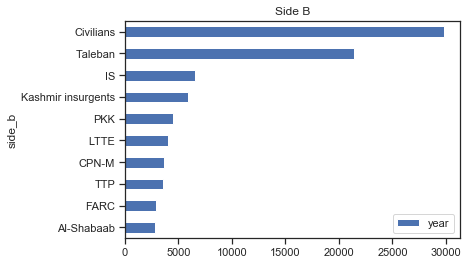

In [63]:
SideB=conflict_19_20.groupby('side_b').count()[['year']]
SideB.sort_values(by=['year'])[-10:].plot.barh(stacked=True)
plt.title('Side B')
plt.show()

#### Where conflict happened (first 10)

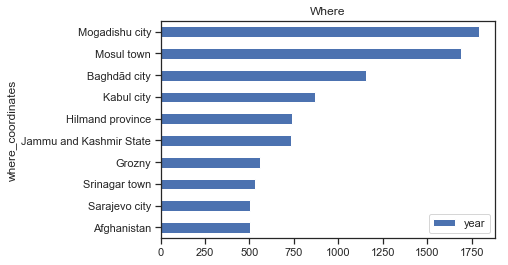

In [64]:
Where=conflict_19_20.groupby('where_coordinates').count()[['year']]
Where.sort_values(by=['year'])[-10:].plot.barh(stacked=True)
plt.title('Where')
plt.show()